#### Audio Classification Data Preprocessing

In [2]:
import librosa
import numba
import numpy
import tensorflow as tf
print("NumPy version:", numpy.__version__)
print("Numba version:", numba.__version__)
print("Tensorflow version:",tf.__version__)
print("Librosa version:",librosa.__version__)

NumPy version: 2.0.2
Numba version: 0.60.0
Tensorflow version: 2.18.0
Librosa version: 0.10.2.post1


In [3]:
audio_file_path=r'C:\Users\Mihir\Audio_Classification\audio\fold4\135528-6-4-2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [4]:
print(librosa_audio_data)

[ 0.1017779   0.09252265 -0.01029476 ...  0.28079608  0.26662326
  0.22703297]


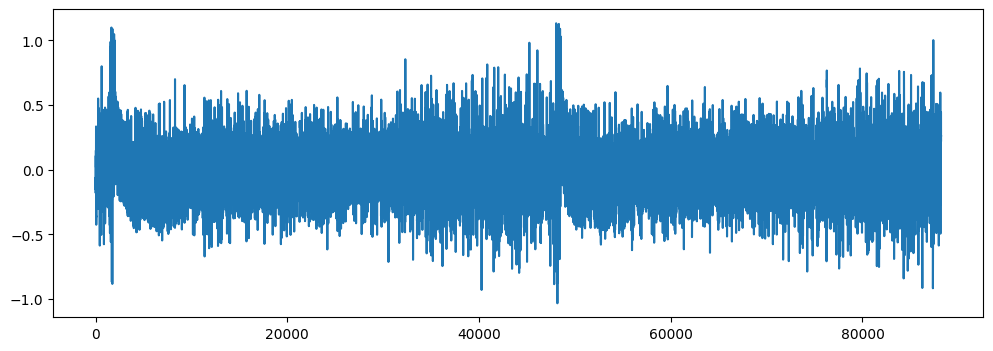

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [6]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [7]:
wave_audio

array([[5318, 4033],
       [4459, 3127],
       [3304, 1978],
       ...,
       [8509, 7693],
       [7680, 6546],
       [6925, 5669]], dtype=int16)

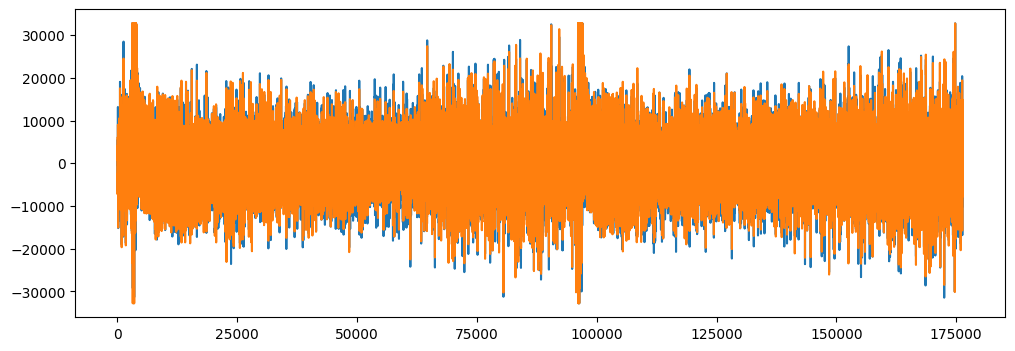

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [9]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [10]:
mfccs

array([[-9.0757378e+01, -6.4957870e+01,  2.5701323e+01, ...,
        -3.1466866e+01, -3.4667324e+01, -5.0364735e+01],
       [ 1.7926303e+02,  1.9429706e+02,  1.0372595e+02, ...,
         1.8602203e+02,  1.8453941e+02,  1.6647110e+02],
       [-3.8887314e+01, -4.5582771e+01,  3.7404199e+00, ...,
        -3.6085999e+01, -2.9083427e+01, -2.3078842e+01],
       ...,
       [-1.1893963e+00, -9.9441922e-01,  4.5947514e+00, ...,
        -1.4260173e+00, -3.3234169e+00, -2.1230774e+00],
       [-2.9536510e+00, -6.3421693e+00, -1.1170654e+00, ...,
        -2.6557617e+00, -9.8496598e-01, -6.0143051e+00],
       [ 8.0155127e-02,  8.3574450e-01,  2.6181114e+00, ...,
        -1.2515843e+00,  2.3683584e+00, -1.1718901e+00]], dtype=float32)

In [12]:
import pandas as pd
import os
import librosa

audio_dataset_path='C:/Users/Mihir/Audio_Classification/audio/'
metadata=pd.read_csv('C:/Users/Mihir/Audio_Classification/metadata2.csv')
metadata.head()

,Unnamed: 0,slice_file_name,fsID,start,end,salience,fold,classID,class
0,0,100032-3-0-0.wav,100032.0,0.0,0.317551,1.0,5,3.0,dog_bark
1,1,100263-2-0-117.wav,100263.0,58.5,62.500000,1.0,5,2.0,children_playing
2,2,100263-2-0-121.wav,100263.0,60.5,64.500000,1.0,5,2.0,children_playing
3,3,100263-2-0-126.wav,100263.0,63.0,67.000000,1.0,5,2.0,children_playing
4,4,100263-2-0-137.wav,100263.0,68.5,72.500000,1.0,5,2.0,children_playing


In [13]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features,axis=1)
    
    return mfccs_scaled_features

In [14]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [07:18,  8.45it/s]C:\Users\Mihir\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [16:57, 13.45it/s]C:\Users\Mihir\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [16:58, 17.11it/s]C:\Users\Mihir\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
9629it [18:50,  8.52it/s]


In [15]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [16]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(9629, 40)

In [18]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'laughter', 'laughter', 'laughter'], dtype='<U16')

In [19]:
y.shape

(9629,)

In [20]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [22]:
y.shape

(9629, 11)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train

array([[-516.0193    ,   90.57641   ,   -5.9716887 , ...,    0.6649486 ,
           1.3720773 ,    0.726882  ],
       [ -91.93015   ,   27.93474   ,  -42.40329   , ...,    4.0705447 ,
          -2.0685377 ,    1.2096167 ],
       [-100.50485   ,   75.717445  , -136.156     , ...,   -1.6173779 ,
          -5.9498897 ,   -5.2066193 ],
       ...,
       [-427.01236   ,   92.62305   ,    3.1293974 , ...,    0.7426412 ,
           0.73349077,    0.71100914],
       [-145.75461   ,  136.26578   ,  -33.515522  , ...,    1.4681195 ,
          -2.00917   ,   -0.8821819 ],
       [-421.03134   ,  210.65454   ,    3.4906607 , ...,   -5.3888674 ,
          -3.3713605 ,   -1.5665114 ]], dtype=float32)

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [26]:
X_train.shape

(7703, 40)

In [27]:
X_test.shape

(1926, 40)

In [28]:
y_train.shape

(7703, 11)

In [29]:
y_test.shape

(1926, 11)

### Model Creation

In [30]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [33]:
X_train.shape

(7703, 40, 1)

In [34]:
model = Sequential()

model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

C:\Users\Mihir\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 38, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 38, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 36, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 18, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 18, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321,419 (1.23 MB)

 Trainable params: 321,419 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
]

In [38]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=100,
    batch_size=32, 
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.2082 - loss: 2.7488 - val_accuracy: 0.5166 - val_loss: 1.4654
Epoch 2/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4143 - loss: 1.6556 - val_accuracy: 0.6147 - val_loss: 1.1851
Epoch 3/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5057 - loss: 1.4298 - val_accuracy: 0.6963 - val_loss: 1.0003
Epoch 4/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5771 - loss: 1.2275 - val_accuracy: 0.7383 - val_loss: 0.8873
Epoch 5/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6174 - loss: 1.1276 - val_accuracy: 0.7560 - val_loss: 0.8027
Epoch 6/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.6481 - loss: 1.0225 - val_accuracy: 0.7700 - val_loss: 0.7276
Epoch 7/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6667 - loss: 0.9751 - val_accuracy: 0.7918 - val_loss: 0.6447
Epoch 8/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7043 - loss: 0.8657 - 

In [39]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9247144460678101


In [40]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([5, 5, 0, ..., 0, 6, 8])

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [41]:
filename = r"C:\Users\Mihir\Audio_Classification\audio\fold4\52441-3-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')

mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features, axis=1)

mfccs_scaled_features = mfccs_scaled_features.reshape(1, 40, 1)
print(mfccs_scaled_features.shape)

y_pred = model.predict(mfccs_scaled_features)
print(y_pred)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

prediction_class = labelencoder.inverse_transform(y_pred_classes)
print(prediction_class)

(1, 40, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
[[4.3949860e-10 2.3108546e-06 6.0643964e-02 9.3528193e-01 6.7824868e-07
  1.4168045e-05 7.5357442e-04 9.1098544e-12 7.2551661e-06 2.5732210e-04
  3.0387968e-03]]
[3]
['dog_bark']


In [42]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

In [43]:
y_testlab=np.argmax(y_test, axis=1)
y_testlab.shape

(1926,)

In [44]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes.shape

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(1926,)

In [45]:
accuracy_score(y_testlab,y_pred_classes)

0.9247144340602285

<Axes: >

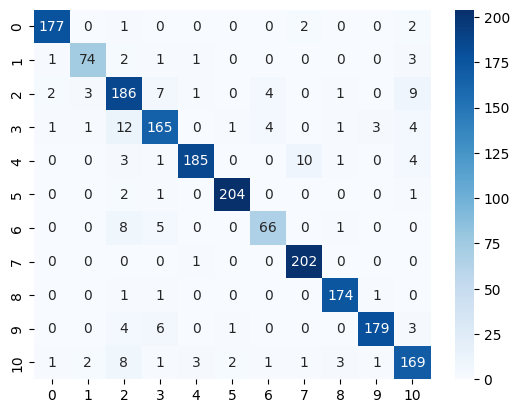

In [46]:
cm=confusion_matrix(y_testlab,y_pred_classes)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')

In [ ]:
model.save(r'final_audio_model.keras')

In [ ]:
class_names = labelencoder.classes_
class_names.shape

In [ ]:
print(classification_report(y_testlab,y_pred_classes,target_names=class_names))

In [ ]:
import pickle
with open('final_audio_classes.pkl', 'wb') as file:
    pickle.dump(labelencoder, file)

0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = laughter
9 = siren
10 = street_music